## Calculating the Return of a Portfolio of Securities

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.get_data_yahoo(t, datetime(1995, 1, 1))['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7097 entries, 1995-01-03 to 2023-03-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7097 non-null   float64
 1   MSFT    7097 non-null   float64
 2   F       7097 non-null   float64
 3   GE      7097 non-null   float64
dtypes: float64(4)
memory usage: 277.2 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.771259,2.346930,3.970338,25.531643
1995-01-04,7.708965,2.363990,4.077163,25.531643
1995-01-05,7.599948,2.324995,4.041553,25.594219
1995-01-06,7.615524,2.363990,4.041553,25.469057
1995-01-09,7.584379,2.349367,4.112773,25.218748


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2023-03-06,140.350006,256.869995,12.98,87.059998
2023-03-07,137.559998,254.149994,12.83,86.389999
2023-03-08,137.580002,253.699997,12.98,86.980003
2023-03-09,136.570007,252.320007,12.45,91.559998
2023-03-10,137.190002,248.589996,12.10,91.000000


### Normalization to 100

$$
\frac{P_t}{P_0} * 100
$$

Normalize to 100 so we can compare the securities as if they were all starting from the same value

In [8]:
mydata.iloc[0]

PG       7.771259
MSFT     2.346930
F        3.970338
GE      25.531643
Name: 1995-01-03 00:00:00, dtype: float64

<Axes: xlabel='Date'>

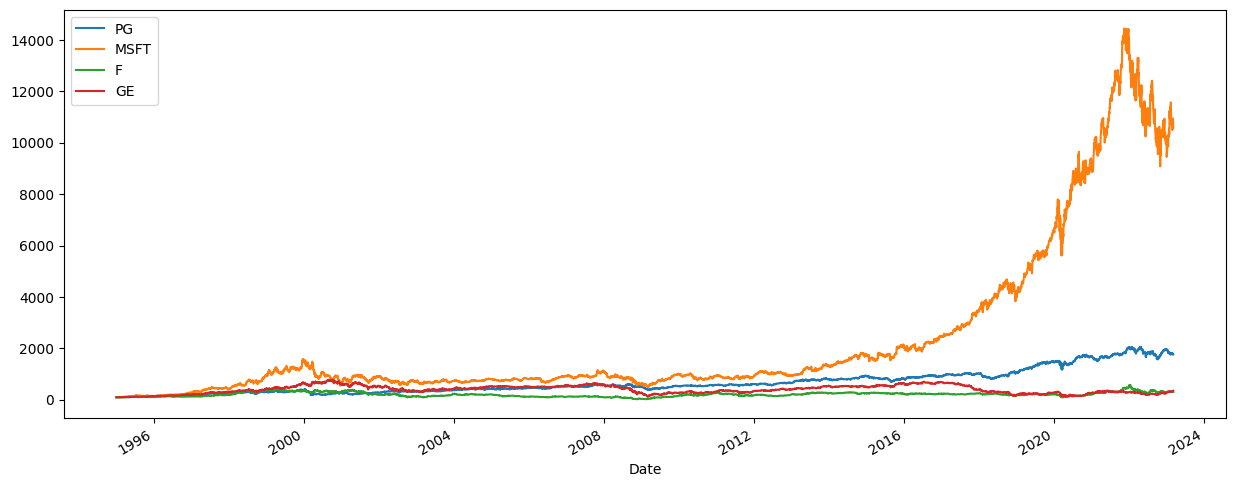

In [9]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))

### Calculating the Return of a Portfolio of Securities

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [11]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
np.dot(returns, weights)

array([        nan,  0.00653968, -0.00922992, ...,  0.00422392,
       -0.00023923, -0.01111792])

In [12]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.126086
MSFT    0.213681
F       0.120454
GE      0.096354
dtype: float64

In [13]:
np.dot(annual_returns, weights)

0.139143709592048

In [17]:
pfolio_1 = round(np.dot(annual_returns, weights) * 100, 3)
print(f"Portfolio return: {pfolio_1} %")

Portfolio return: 13.914 %


In [18]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])
pfolio_2 = round(np.dot(annual_returns, weights_2) * 100, 3)
print(f"Portfolio 1 return: {pfolio_1} %")
print(f"Portfolio 2 return: {pfolio_2} %")

Portfolio 1 return: 13.914 %
Portfolio 2 return: 15.879 %
